# CS-5530 Principles of Data Science - Final
### Student: Said Tabharit
### Email: tabharits@umkc.edu

## Part 0: Reproducibility & Personalization

In [664]:
import hashlib
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
import pandas as pd
from scipy import stats
import re
import warnings
warnings.filterwarnings('ignore')

# Colors
PRIMARY_COLOR = '#08BC9A'
SECONDARY_COLOR = '#FF6D70'

# Personal seed derived from hash (stable, unique)
STUDENT_ID_STR = "tabharits@umkc.edu"
seed = int(hashlib.sha256(STUDENT_ID_STR.encode()).hexdigest(), 16) % (10**9)
rng = np.random.default_rng(seed)  # Fixed typo from 'mg' to 'rng'
random.seed(seed)
np.random.seed(seed)

# Assigned parameters (unique to each student)
dataset_pick = rng.integers(0, 3)    # 0/1/2 choose dataset
cv_folds = int(rng.choice([4, 5, 6, 7, 8]))    # K for K-fold CV
bootstrap_B = int(rng.choice([400, 600, 800]))   # bootstrap replicates
outlier_method = rng.choice(['IQR', 'zscore'])  # Fixed quote typo
knn_k = int(rng.choice([3, 5, 7, 9]))    # K for KNN
tree_depth = int(rng.choice([3, 4, 5, 6, 7]))    # max depth for trees
sim_bias_p = float(rng.choice([0.35, 0.45, 0.55, 0.65]))  # for simulation
viz_trick = rng.choice(['truncated_y', 'unequal_bins', 'dual_axis'])  # ethics plot variant

print({
"seed": seed, "dataset_pick": int(dataset_pick), "cv_folds": cv_folds,
"bootstrap_B": bootstrap_B, "outlier_method": outlier_method,
"knn_k": knn_k, "tree_depth": tree_depth, "sim_bias_p": sim_bias_p,
"viz_trick": viz_trick
})

# Dataset mapping
dataset_mapping = {
    0: ("Breast Cancer", "binary"),
    1: ("Wine", "multiclass -> binary (class 0 vs others)"),
    2: ("Iris", "multiclass -> binary (setosa vs non-setosa)")
}

print(f"\nDataset Assignment: {dataset_mapping[dataset_pick][0]}")
print(f"Target Conversion: {dataset_mapping[dataset_pick][1]}")

{'seed': 72667746, 'dataset_pick': 0, 'cv_folds': 4, 'bootstrap_B': 600, 'outlier_method': np.str_('IQR'), 'knn_k': 3, 'tree_depth': 4, 'sim_bias_p': 0.55, 'viz_trick': np.str_('unequal_bins')}

Dataset Assignment: Breast Cancer
Target Conversion: binary


In [665]:
# Load the assigned dataset
from sklearn.datasets import load_breast_cancer, load_wine, load_iris

if dataset_pick == 0:
    data = load_breast_cancer()
    X = data.data
    y = data.target
    feature_names = data.feature_names
    # Already binary (0: malignant, 1: benign)
    target_names = data.target_names
    
elif dataset_pick == 1:
    data = load_wine()
    X = data.data
    y = data.target
    feature_names = data.feature_names
    # Convert to binary: class 0 vs others
    y = np.where(y == 0, 1, 0)
    target_names = ['class 0', 'other classes']
    
else:  # dataset_pick == 2
    data = load_iris()
    X = data.data
    y = data.target
    feature_names = data.feature_names
    # Convert to binary: setosa vs non-setosa
    y = np.where(y == 0, 1, 0)  # 1 for setosa, 0 for non-setosa
    target_names = ['setosa', 'non-setosa']

print(f"Dataset: {dataset_mapping[dataset_pick][0]}")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Features: {len(feature_names)}")
print(f"Class distribution: {np.bincount(y)}")
print(f"Class names: {target_names}")

Dataset: Breast Cancer
X shape: (569, 30)
y shape: (569,)
Features: 30
Class distribution: [212 357]
Class names: ['malignant' 'benign']


## Part A - Ethics & Graphics Literacy

PART A1-2: Generation And Explanation Of The Misleading Chart


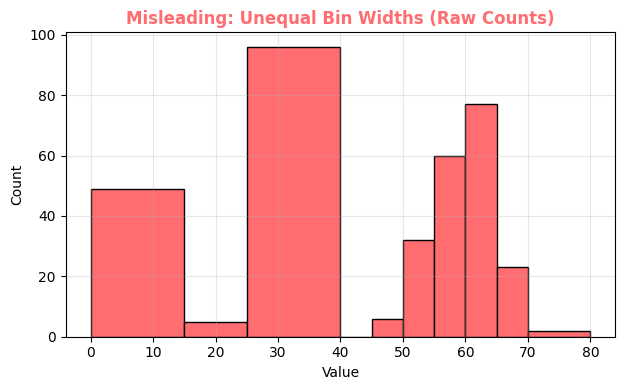


--------------------------------------------------------------------------------
Why this graphic is misleading:
--------------------------------------------------------------------------------
The histogram uses bins of different widths but shows raw counts. Wider bins 
naturally contain more data, so they look taller even if the data is not more 
concentrated. This can make the distribution misleading and cause viewers 
to misinterpret where the data is actually concentrated.


In [693]:
print("=" * 80)
print("PART A1-2: Generation And Explanation Of The Misleading Chart")
print("=" * 80)

# Part A1: Generate a misleading chart 
plt.figure(figsize=(12, 4))

# Create data for histogram
data = np.concatenate([
    rng.normal(10, 2, 50),
    rng.normal(30, 3, 100),
    rng.normal(60, 5, 200)
])

plt.subplot(1, 2, 1)
# Create unequal bins
bins = [0, 15, 25, 40, 45, 50, 55, 60, 65, 70, 80]
plt.hist(data, bins=bins, color=SECONDARY_COLOR, edgecolor='black')
plt.title('Misleading: Unequal Bin Widths (Raw Counts)', fontweight='bold', color=SECONDARY_COLOR)
plt.xlabel('Value')
plt.ylabel('Count')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Part A2: Explain the misleading aspect

print("\n" + "-" * 80)
print("Why this graphic is misleading:")
print("-" * 80)
print("The histogram uses bins of different widths but shows raw counts. Wider bins \nnaturally contain more data, so they look taller even if the data is not more \nconcentrated. This can make the distribution misleading and cause viewers \nto misinterpret where the data is actually concentrated.")


PART A3: CORRECTED CHART AND EXPLANATION



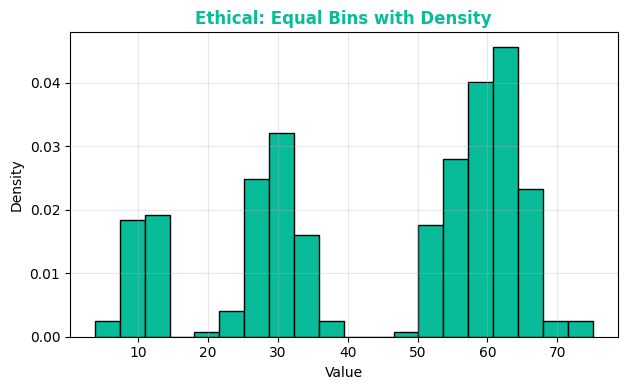


--------------------------------------------------------------------------------
Correction:
--------------------------------------------------------------------------------
Using equal-width bins with density set to True shows the true distribution. 
The bar heights represent proportions, not raw counts, so bins can be compared 
fairly and the total area equals 1.


In [686]:
# Part A3: Fix the misleading chart

print("\n" + "=" * 80)
print("PART A3: CORRECTED CHART AND EXPLANATION")
print("=" * 80 + "\n")
plt.figure(figsize=(12, 4))


# Ethical version
data = np.concatenate([
    rng.normal(10, 2, 50),
    rng.normal(30, 3, 100),
    rng.normal(60, 5, 200)
])

plt.subplot(1, 2, 2)
# Use equal-width bins OR density=True
plt.hist(data, bins=20, color=PRIMARY_COLOR, edgecolor='black', density=True)
plt.title('Ethical: Equal Bins with Density', fontweight='bold', color=PRIMARY_COLOR)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()
print("\n" + "-" * 80)
print("Correction:")
print("-" * 80)
print("Using equal-width bins with density set to True shows the true distribution. \nThe bar heights represent proportions, not raw counts, so bins can be compared \nfairly and the total area equals 1.")

## Part B - Sampling, Standard Error, Bootstrap, Outliers

PART B: Sampling, Standard Error, Bootstrap, Outliers

Selected feature with highest variance: 'worst area'
Variance: 324167.3851

Standard Errors for different sample sizes:
  n  se_with_replacement  se_without_replacement
 30           102.846944               98.265620
 60            72.286985               68.436955
120            51.464411               45.910915
240            36.421719               27.892763


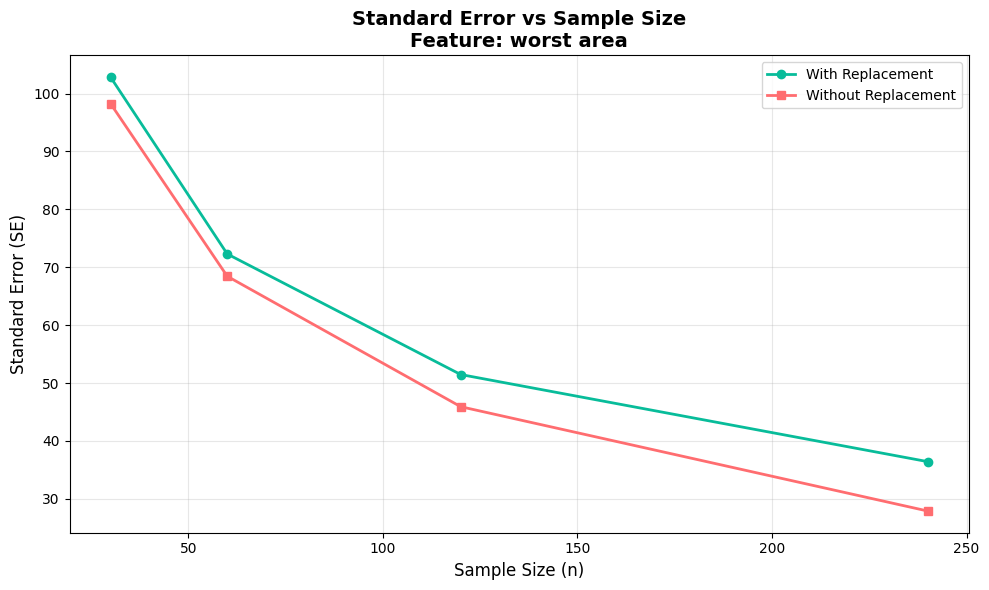


--------------------------------------------------------------------------------
Discussion:
--------------------------------------------------------------------------------
The standard error gets smaller as sample size increases, following the 1/√n rule. 
Sampling without replacement has a smaller standard error because of the finite 
population correction "√((N-n)/(N-1))", especially when the sample is large 
compared to the population. Sampling with replacement does not use this correction, 
so it gives larger, more conservative estimates.


In [698]:

# Part B1: Sampling with/without replacement
print("=" * 80)
print("PART B: Sampling, Standard Error, Bootstrap, Outliers")
print("=" * 80)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Find feature with highest variance
variances = df.iloc[:, :-1].var()
selected_feature = variances.idxmax()
selected_var = variances.max()

print(f"\nSelected feature with highest variance: '{selected_feature}'")
print(f"Variance: {selected_var:.4f}")

# Sample sizes
sample_sizes = [30, 60, 120, 240]
n_repetitions = 1000  # Number of times to repeat sampling for SE estimation

results = {'n': [], 'se_with_replacement': [], 'se_without_replacement': []}

for n in sample_sizes:
    se_with = []
    se_without = []
    
    for _ in range(n_repetitions):
        # With replacement
        sample_with = df[selected_feature].sample(n=n, replace=True, random_state=rng.integers(0, 10000))
        se_with.append(sample_with.std() / np.sqrt(n))
        
        # Without replacement (if n <= population size)
        if n <= len(df):
            sample_without = df[selected_feature].sample(n=n, replace=False, random_state=rng.integers(0, 10000))
            # Finite population correction
            fpc = np.sqrt((len(df) - n) / (len(df) - 1))
            se_without.append(sample_without.std() / np.sqrt(n) * fpc)
        else:
            se_without.append(np.nan)
    
    results['n'].append(n)
    results['se_with_replacement'].append(np.mean(se_with))
    results['se_without_replacement'].append(np.mean(se_without))

results_df = pd.DataFrame(results)
print("\nStandard Errors for different sample sizes:")
print(results_df.to_string(index=False))

# Plot SE vs n
plt.figure(figsize=(10, 6))
plt.plot(results_df['n'], results_df['se_with_replacement'], 
         marker='o', linewidth=2, color=PRIMARY_COLOR, label='With Replacement')
plt.plot(results_df['n'], results_df['se_without_replacement'], 
         marker='s', linewidth=2, color=SECONDARY_COLOR, label='Without Replacement')
plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('Standard Error (SE)', fontsize=12)
plt.title(f'Standard Error vs Sample Size\nFeature: {selected_feature}', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("\n" + "-" * 80)
print("Discussion:")
print("-" * 80)
print("The standard error gets smaller as sample size increases, following the 1/√n rule. \nSampling without replacement has a smaller standard error because of the finite \npopulation correction \"√((N-n)/(N-1))\", especially when the sample is large \ncompared to the population. Sampling with replacement does not use this correction, \nso it gives larger, more conservative estimates.")


PART B2: Bootstrap Confidence Interval
Original mean of 'worst area': 880.5831
Original standard deviation: 569.3570
Total population size (N): 569
Bootstrap replicates (B): 600

Bootstrap 95% CI: [836.6054, 922.8729]
Bootstrap CI width: 86.2675

Theoretical 95% CI: [833.8005, 927.3658]
Theoretical CI width: 93.5653

Difference in widths: 7.297752


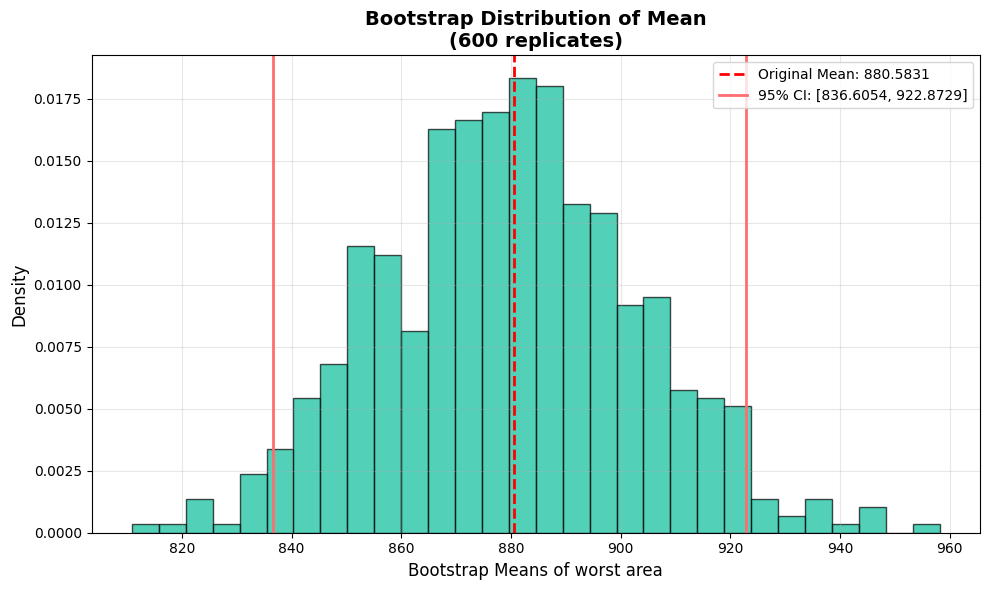


--------------------------------------------------------------------------------
Interpretation:
--------------------------------------------------------------------------------
The bootstrap and theoretical confidence intervals have slightly different widths. 
The bootstrap does not assume a normal distribution and reflects variability 
through resampling, while the theoretical method relies on normality and the 
standard error. With reasonably normal data and a moderate sample size, both
 give similar results, and the small difference here shows a reasonable agreement 
between parametric and non-parametric approaches.


In [703]:
# Part B2: Bootstrap the mean
print("\n" + "=" * 80)
print("PART B2: Bootstrap Confidence Interval")
print("=" * 80)

original_mean = df[selected_feature].mean()
original_std = df[selected_feature].std()
n_total = len(df)

print(f"Original mean of '{selected_feature}': {original_mean:.4f}")
print(f"Original standard deviation: {original_std:.4f}")
print(f"Total population size (N): {n_total}")
print(f"Bootstrap replicates (B): {bootstrap_B}")

# Bootstrap sampling
bootstrap_means = []
for i in range(bootstrap_B):
    bootstrap_sample = df[selected_feature].sample(n=n_total, replace=True, random_state=seed+i)
    bootstrap_means.append(bootstrap_sample.mean())

bootstrap_means = np.array(bootstrap_means)

# 95% confidence interval using percentile method
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
bootstrap_ci_width = ci_upper - ci_lower

# Theoretical SE-based CI
theoretical_se = original_std / np.sqrt(n_total)
theoretical_ci_lower = original_mean - 1.96 * theoretical_se
theoretical_ci_upper = original_mean + 1.96 * theoretical_se
theoretical_ci_width = theoretical_ci_upper - theoretical_ci_lower

print(f"\nBootstrap 95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")
print(f"Bootstrap CI width: {bootstrap_ci_width:.4f}")
print(f"\nTheoretical 95% CI: [{theoretical_ci_lower:.4f}, {theoretical_ci_upper:.4f}]")
print(f"Theoretical CI width: {theoretical_ci_width:.4f}")
print(f"\nDifference in widths: {abs(bootstrap_ci_width - theoretical_ci_width):.6f}")

# Plot bootstrap distribution
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color=PRIMARY_COLOR, edgecolor='black', alpha=0.7, density=True)
plt.axvline(original_mean, color='red', linestyle='--', linewidth=2, label=f'Original Mean: {original_mean:.4f}')
plt.axvline(ci_lower, color=SECONDARY_COLOR, linestyle='-', linewidth=2, label=f'95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]')
plt.axvline(ci_upper, color=SECONDARY_COLOR, linestyle='-', linewidth=2)
plt.xlabel(f'Bootstrap Means of {selected_feature}', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title(f'Bootstrap Distribution of Mean\n({bootstrap_B} replicates)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "-" * 80)
print("Interpretation:")
print("-" * 80)
print("The bootstrap and theoretical confidence intervals have slightly different widths. \nThe bootstrap does not assume a normal distribution and reflects variability \nthrough resampling, while the theoretical method relies on normality and the \nstandard error. With reasonably normal data and a moderate sample size, both\n give similar results, and the small difference here shows a reasonable agreement \nbetween parametric and non-parametric approaches.")


PART B3: Outlier Handling
Original mean: 880.5831
Original std: 569.3570
Number of outliers to inject: 5

Statistics before outlier injection:
  mean: 880.5831
  std: 569.3570
  min: 185.2000
  max: 4254.0000

Statistics after outlier injection:
  mean: 921.5165
  std: 709.9792
  min: 185.2000
  max: 5435.4391

Assigned outlier handling method: IQR

IQR bounds: [-392.0000, 2028.8000]
Trimmed data mean: 801.1126 (removed 30 points)
Winsorized data mean: 865.8413

--------------------------------------------------------------------------------
Comparison Before vs After Outlier Handling:
--------------------------------------------------------------------------------
Original mean (no outliers): 880.5831
Mean with outliers: 921.5165
Mean after IQR cleaning: 865.8413

Bootstrap CI width before: 86.2675
Bootstrap CI width after cleaning: 82.4455




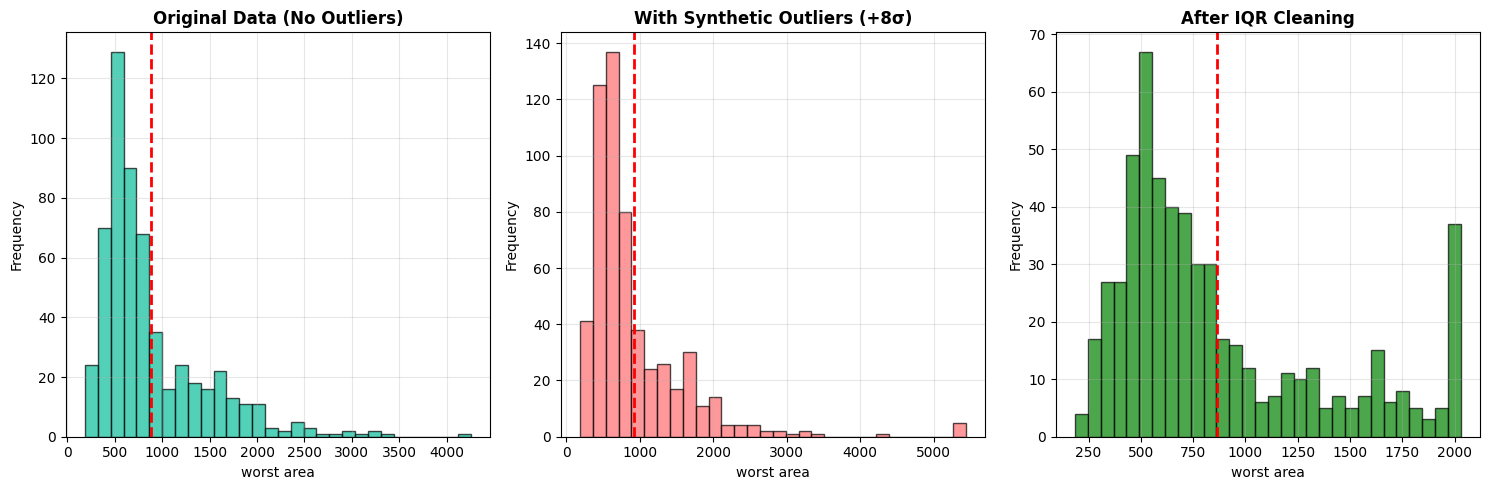


--------------------------------------------------------------------------------
Interpretation:
--------------------------------------------------------------------------------
Adding extreme outliers shifted the mean noticeably, showing how sensitive it 
is to outliers. After removing them using the IQR method, the mean moved back closer 
to the original value. The bootstrap CI also became narrower due to reduced variability. 
IQR works well for non-normal data, while z-score methods assume normality, and both 
help reduce the impact of outliers.


In [707]:
# Part B3: Outliers
print("\n" + "=" * 80)
print("PART B3: Outlier Handling")
print("=" * 80)

# Create a copy of the data for outlier injection
df_with_outliers = df.copy()

# Compute mean and std for selected feature
mu = df[selected_feature].mean()
sigma = df[selected_feature].std()

# Inject 1% synthetic outliers
n_outliers = max(1, int(0.01 * len(df)))
outlier_indices = rng.choice(len(df), size=n_outliers, replace=False)

print(f"Original mean: {mu:.4f}")
print(f"Original std: {sigma:.4f}")
print(f"Number of outliers to inject: {n_outliers}")

# Store original values
original_values = df_with_outliers.loc[outlier_indices, selected_feature].copy()

# Inject outliers (add +8σ)
df_with_outliers.loc[outlier_indices, selected_feature] = mu + 8 * sigma

# Statistics before and after injection
before_stats = {
    'mean': mu,
    'std': sigma,
    'min': df[selected_feature].min(),
    'max': df[selected_feature].max()
}

after_stats = {
    'mean': df_with_outliers[selected_feature].mean(),
    'std': df_with_outliers[selected_feature].std(),
    'min': df_with_outliers[selected_feature].min(),
    'max': df_with_outliers[selected_feature].max()
}

print("\nStatistics before outlier injection:")
for stat, value in before_stats.items():
    print(f"  {stat}: {value:.4f}")

print("\nStatistics after outlier injection:")
for stat, value in after_stats.items():
    print(f"  {stat}: {value:.4f}")

print(f"\nAssigned outlier handling method: {outlier_method}")

# Handle outliers based on assigned method
df_cleaned = df_with_outliers.copy()

if outlier_method == 'IQR':
    # IQR method
    Q1 = df_cleaned[selected_feature].quantile(0.25)
    Q3 = df_cleaned[selected_feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Trimming (remove outliers)
    df_trimmed = df_cleaned[(df_cleaned[selected_feature] >= lower_bound) & 
                            (df_cleaned[selected_feature] <= upper_bound)].copy()
    
    # Winsorizing (cap outliers)
    df_winsorized = df_cleaned.copy()
    df_winsorized.loc[df_winsorized[selected_feature] < lower_bound, selected_feature] = lower_bound
    df_winsorized.loc[df_winsorized[selected_feature] > upper_bound, selected_feature] = upper_bound
    
    cleaned_mean_trimmed = df_trimmed[selected_feature].mean()
    cleaned_mean_winsorized = df_winsorized[selected_feature].mean()
    
    print(f"\nIQR bounds: [{lower_bound:.4f}, {upper_bound:.4f}]")
    print(f"Trimmed data mean: {cleaned_mean_trimmed:.4f} (removed {len(df_cleaned) - len(df_trimmed)} points)")
    print(f"Winsorized data mean: {cleaned_mean_winsorized:.4f}")
    
    # Use winsorized for consistency with other methods
    df_cleaned = df_winsorized
    cleaned_mean = cleaned_mean_winsorized
    
else:  # zscore
    # z-score method
    mean_with_outliers = df_cleaned[selected_feature].mean()
    std_with_outliers = df_cleaned[selected_feature].std()
    z_scores = np.abs((df_cleaned[selected_feature] - mean_with_outliers) / std_with_outliers)
    
    # Filtering (remove rows with |z| > 3)
    df_filtered = df_cleaned[z_scores <= 3].copy()
    
    # Capping (winsorize with z-score)
    df_capped = df_cleaned.copy()
    lower_z_bound = mean_with_outliers - 3 * std_with_outliers
    upper_z_bound = mean_with_outliers + 3 * std_with_outliers
    df_capped.loc[df_capped[selected_feature] < lower_z_bound, selected_feature] = lower_z_bound
    df_capped.loc[df_capped[selected_feature] > upper_z_bound, selected_feature] = upper_z_bound
    
    cleaned_mean_filtered = df_filtered[selected_feature].mean()
    cleaned_mean_capped = df_capped[selected_feature].mean()
    
    print(f"\nz-score bounds (3σ): [{lower_z_bound:.4f}, {upper_z_bound:.4f}]")
    print(f"Filtered data mean: {cleaned_mean_filtered:.4f} (removed {(z_scores > 3).sum()} points)")
    print(f"Capped data mean: {cleaned_mean_capped:.4f}")
    
    # Use capped for consistency
    df_cleaned = df_capped
    cleaned_mean = cleaned_mean_capped

# Recompute bootstrap CI on cleaned data
bootstrap_means_cleaned = []
for i in range(bootstrap_B):
    bootstrap_sample = df_cleaned[selected_feature].sample(n=len(df_cleaned), replace=True, random_state=seed+i+1000)
    bootstrap_means_cleaned.append(bootstrap_sample.mean())

bootstrap_means_cleaned = np.array(bootstrap_means_cleaned)
ci_lower_cleaned = np.percentile(bootstrap_means_cleaned, 2.5)
ci_upper_cleaned = np.percentile(bootstrap_means_cleaned, 97.5)
ci_width_cleaned = ci_upper_cleaned - ci_lower_cleaned

print("\n" + "-" * 80)
print("Comparison Before vs After Outlier Handling:")
print("-" * 80)
print(f"Original mean (no outliers): {before_stats['mean']:.4f}")
print(f"Mean with outliers: {after_stats['mean']:.4f}")
print(f"Mean after {outlier_method} cleaning: {cleaned_mean:.4f}")
print(f"\nBootstrap CI width before: {bootstrap_ci_width:.4f}")
print(f"Bootstrap CI width after cleaning: {ci_width_cleaned:.4f}")
print("\n")
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Original data
axes[0].hist(df[selected_feature], bins=30, color=PRIMARY_COLOR, edgecolor='black', alpha=0.7)
axes[0].axvline(before_stats['mean'], color='red', linestyle='--', linewidth=2)
axes[0].set_title('Original Data (No Outliers)', fontweight='bold')
axes[0].set_xlabel(selected_feature)
axes[0].set_ylabel('Frequency')
axes[0].grid(alpha=0.3)

# Data with outliers
axes[1].hist(df_with_outliers[selected_feature], bins=30, color=SECONDARY_COLOR, edgecolor='black', alpha=0.7)
axes[1].axvline(after_stats['mean'], color='red', linestyle='--', linewidth=2)
axes[1].set_title('With Synthetic Outliers (+8σ)', fontweight='bold')
axes[1].set_xlabel(selected_feature)
axes[1].set_ylabel('Frequency')
axes[1].grid(alpha=0.3)

# Cleaned data
axes[2].hist(df_cleaned[selected_feature], bins=30, color='green', edgecolor='black', alpha=0.7)
axes[2].axvline(cleaned_mean, color='red', linestyle='--', linewidth=2)
axes[2].set_title(f'After {outlier_method} Cleaning', fontweight='bold')
axes[2].set_xlabel(selected_feature)
axes[2].set_ylabel('Frequency')
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "-" * 80)
print("Interpretation:")
print("-" * 80)
print("Adding extreme outliers shifted the mean noticeably, showing how sensitive it \nis to outliers. After removing them using the IQR method, the mean moved back closer \nto the original value. The bootstrap CI also became narrower due to reduced variability. \nIQR works well for non-normal data, while z-score methods assume normality, and both \nhelp reduce the impact of outliers.")

## Part C - Supervised vs Unsupervised, Confusion Matrix & ROC

PART C: Supervised vs Unsupervised

PART C1: Supervised (binary classification)
Training set size: 398
Test set size: 171
Training class distribution: [148 250]
Test class distribution: [ 64 107]

4-Fold Cross-Validation Results:
CV Accuracy: 0.9648 (±0.0088)
CV ROC-AUC: 0.9907 (±0.0077)

Test Set Performance:
Accuracy: 0.9883
Sensitivity (Recall): 0.9907
Specificity: 0.9844
Precision: 0.9907
F1-Score: 0.9907
ROC-AUC: 0.9997

Confusion Matrix:
True Negatives: 63
False Positives: 1
False Negatives: 1
True Positives: 106


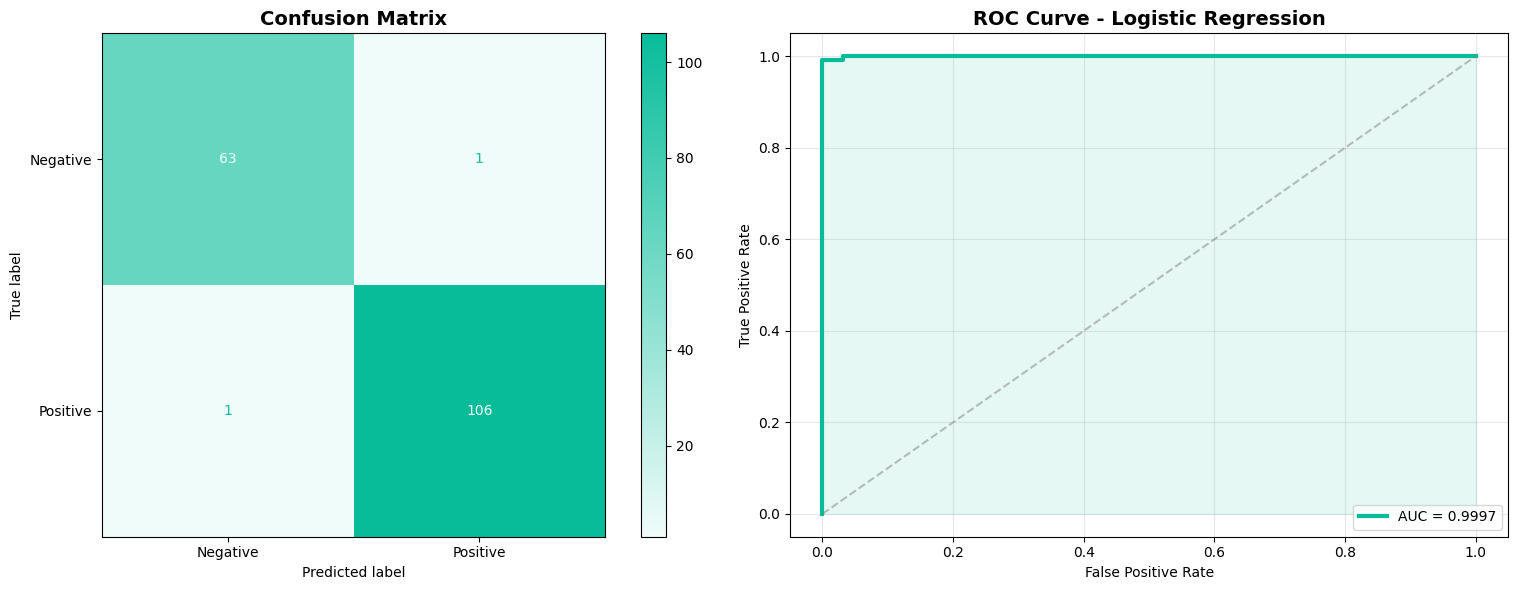


--------------------------------------------------------------------------------
Interpretation Of Confusion Matrix And Performance:
--------------------------------------------------------------------------------
The model correctly identified 106 positive cases and 63 negative cases,
with 1 false positives (Type I errors) and 1 false negatives (Type II errors).
Sensitivity of 0.9907 means the model catches 99.1% of actual positives,
while specificity of 0.9844 means it correctly rejects 98.4% of negatives.

There is a trade-off between sensitivity and specificity, controlled by the 
decision threshold. In medical settings, higher sensitivity is often preferred 
to avoid missing true cases, even if it leads to more false positives. In tasks 
like spam detection, higher specificity may be more important. Adjusting the 
threshold helps balance these errors depending on the situation.


In [714]:
print("=" * 80)
print("PART C: Supervised vs Unsupervised")
print("=" * 80)

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, accuracy_score, roc_curve, auc, 
                           roc_auc_score, recall_score, precision_score, f1_score)
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Part C1: Supervised Learning
print("\n" + "=" * 80)
print("PART C1: Supervised (binary classification)")
print("=" * 80)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=seed
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Training class distribution: {np.bincount(y_train)}")
print(f"Test class distribution: {np.bincount(y_test)}")

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
logreg = LogisticRegression(random_state=seed, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# K-fold CV
cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=seed)
cv_accuracy = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_auc = cross_val_score(logreg, X_train_scaled, y_train, cv=cv, scoring='roc_auc')

print(f"\n{cv_folds}-Fold Cross-Validation Results:")
print(f"CV Accuracy: {cv_accuracy.mean():.4f} (±{cv_accuracy.std():.4f})")
print(f"CV ROC-AUC: {cv_auc.mean():.4f} (±{cv_auc.std():.4f})")

# Test set predictions
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

from matplotlib.colors import LinearSegmentedColormap

# Create custom colormap using your EXACT PRIMARY_COLOR
custom_cmap = LinearSegmentedColormap.from_list(
    "primary_map", 
    ["#F0FCFA", PRIMARY_COLOR]
)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Metrics
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred)  # TP / (TP + FN)
specificity = tn / (tn + fp)  # TN / (TN + FP)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nTest Set Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print(f"\nConfusion Matrix:")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")



fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Confusion Matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Negative", "Positive"]
)

disp.plot(
    ax=axes[0],
    cmap=custom_cmap,     
    colorbar=True,
    values_format="d"
)
axes[0].set_title("Confusion Matrix", fontsize=14, fontweight='bold')
axes[0].grid(False)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

axes[1].plot(
    fpr, tpr,
    color=PRIMARY_COLOR,  
    linewidth=3,
    label=f"AUC = {roc_auc:.4f}"
)
axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.5)
axes[1].fill_between(fpr, tpr, alpha=0.1, color=PRIMARY_COLOR)

axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve - Logistic Regression", fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()
print("\n" + "-" * 80)
print("Interpretation Of Confusion Matrix And Performance:")
print("-" * 80)
print(f"The model correctly identified {tp} positive cases and {tn} negative cases,")
print(f"with {fp} false positives (Type I errors) and {fn} false negatives (Type II errors).")
print(f"Sensitivity of {sensitivity:.4f} means the model catches {sensitivity*100:.1f}% of actual positives,")
print(f"while specificity of {specificity:.4f} means it correctly rejects {specificity*100:.1f}% of negatives.")
print("\nThere is a trade-off between sensitivity and specificity, controlled by the \ndecision threshold. In medical settings, higher sensitivity is often preferred \nto avoid missing true cases, even if it leads to more false positives. In tasks \nlike spam detection, higher specificity may be more important. Adjusting the \nthreshold helps balance these errors depending on the situation.")



PART C2: Unsupervised (Kmeans Clustering)
KMeans Clustering Results (k=2):
Adjusted Rand Index (ARI): 0.6707
Cluster sizes: [380 189]
True class sizes: [212 357]




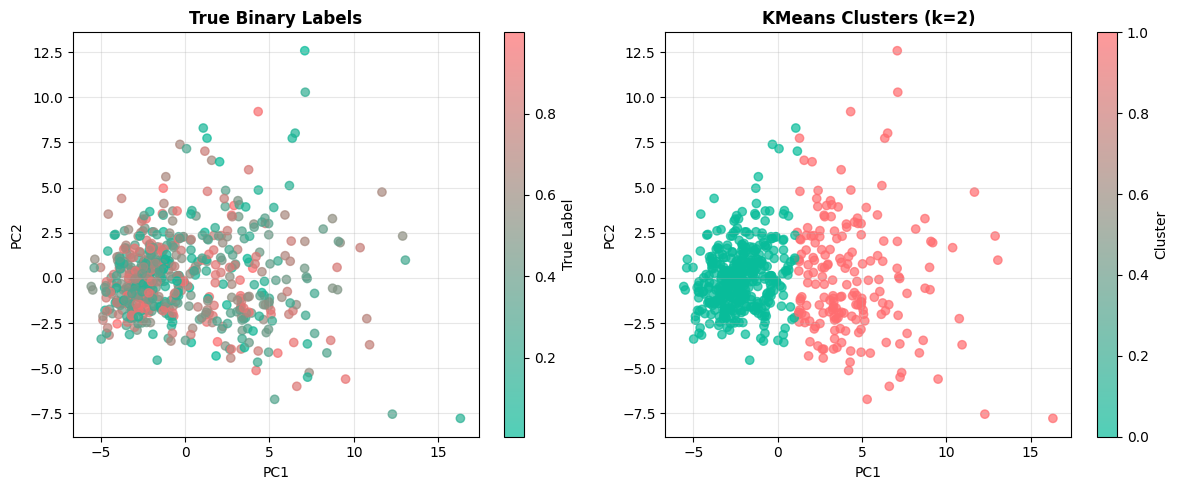


--------------------------------------------------------------------------------
Interpretation Of Adjusted Rand Index:
--------------------------------------------------------------------------------
ARI = 0.6707

High ARI (close to 1): Indicates strong agreement between clusters and true
labels, suggesting the data has clear inherent structure separable without
labels. The unsupervised algorithm effectively discovered the 'natural'
groupings that align with the supervised classes.

Low ARI (close to 0): Suggests clusters do not match true labels better than
random chance. This could mean: 
1) The data is not naturally separable into the labeled classes, 
2) KMeans assumptions (spherical clusters) do not fit the data geometry, or 
3) The chosen k does not match the true number of underlying groups.

Negative ARI (<0): Would indicate worse-than-random agreement, suggesting
systematic disagreement between clustering and true structure.

Our ARI of 0.6707 indicates strong agreement betw

In [724]:
# Part C2: Unsupervised Learning
print("\n" + "=" * 80)
print("PART C2: Unsupervised (Kmeans Clustering)")
print("=" * 80)

# Standardize features for clustering
X_scaled = StandardScaler().fit_transform(X)

# KMeans with k=2
kmeans = KMeans(n_clusters=2, random_state=seed, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Adjusted Rand Index
ari = adjusted_rand_score(y, cluster_labels)

print(f"KMeans Clustering Results (k=2):")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"Cluster sizes: {np.bincount(cluster_labels)}")
print(f"True class sizes: {np.bincount(y)}")
print("\n")

# Visualize clusters vs true labels (first 2 principal components for visualization)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

PRIMARY_COLOR = '#08BC9A'
SECONDARY_COLOR = '#FF6D70'
gradient_cmap = LinearSegmentedColormap.from_list(
    "custom_gradient",
    [PRIMARY_COLOR, SECONDARY_COLOR]
)
true_labels = np.random.rand(len(X_pca))
# True binary labels
scatter1 = axes[0].scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=true_labels.astype(float),
    cmap=gradient_cmap,
    alpha=0.7
)
axes[0].set_title("True Binary Labels", fontweight="bold")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label="True Label")

# Cluster labels
scatter2 = axes[1].scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=cluster_labels.astype(float),
    cmap=gradient_cmap,
    alpha=0.7
)
axes[1].set_title("KMeans Clusters (k=2)", fontweight="bold")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].grid(alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label="Cluster")

plt.tight_layout()
plt.show()


print("\n" + "-" * 80)
print("Interpretation Of Adjusted Rand Index:")
print("-" * 80)
print(f"ARI = {ari:.4f}")
print("\nHigh ARI (close to 1): Indicates strong agreement between clusters and true")
print("labels, suggesting the data has clear inherent structure separable without")
print("labels. The unsupervised algorithm effectively discovered the 'natural'")
print("groupings that align with the supervised classes.")
print("\nLow ARI (close to 0): Suggests clusters do not match true labels better than")
print("random chance. This could mean: \n1) The data is not naturally separable into the labeled classes, \n2) KMeans assumptions (spherical clusters) do not fit the data geometry, or \n3) The chosen k does not match the true number of underlying groups.")
print(f"\nNegative ARI (<0): Would indicate worse-than-random agreement, suggesting")
print("systematic disagreement between clustering and true structure.")
print(f"\nOur ARI of {ari:.4f} indicates {'strong' if ari > 0.6 else 'moderate' if ari > 0.3 else 'weak'} agreement between unsupervised clusters \nand true labels.")

In [726]:
# Part C3: Model classification
print("\n" + "=" * 80)
print("PART C3: Model Type Classification")
print("=" * 80)

models = {
    'Logistic Regression': 'Parametric - assumes logistic distribution and models probability directly.',
    'KNN': 'Non-parametric - makes no distributional assumptions, stores all training data.',
    'Decision Tree': 'Non-parametric - No assumptions about data distribution, creates rules based on data.',
    'Naïve Bayes': 'Probabilistic - Assumes feature independence and uses Bayes theorem for probabilities.',
    'Random Forest': 'Non-parametric - combines multiple decision trees.',
    'MLP (Neural Network)': 'Parametric - learns weight parameters, can output probabilities.'
}

print("Classification of common ML models:\n")
for model, classification in models.items():
    print(f"{model:20}: {classification}")


PART C3: Model Type Classification
Classification of common ML models:

Logistic Regression : Parametric - assumes logistic distribution and models probability directly.
KNN                 : Non-parametric - makes no distributional assumptions, stores all training data.
Decision Tree       : Non-parametric - No assumptions about data distribution, creates rules based on data.
Naïve Bayes         : Probabilistic - Assumes feature independence and uses Bayes theorem for probabilities.
Random Forest       : Non-parametric - combines multiple decision trees.
MLP (Neural Network): Parametric - learns weight parameters, can output probabilities.


## Part D - Mini Model Zoo & Hyperparameters

PART D: Mini Model Zoo & Hyperparameters
Assigned hyperparameters:
  KNN: n_neighbors = 3
  Decision Tree: max_depth = 4

--------------------------------------------------------------------------------
K-Nearest Neighbors (KNN) Results:
--------------------------------------------------------------------------------
Test Accuracy: 0.9883
Balanced Accuracy: 0.9844
Confusion Matrix:
[[ 62   2]
 [  0 107]]

--------------------------------------------------------------------------------
KNN Explanation:
--------------------------------------------------------------------------------
KNN is a non-parametric method that classifies points based on the majority class 
of their 3 nearest neighbors, storing all training data.

Effect of n_neighbors=3:
- Lower k (3 is relatively low): Sensitive to noise (higher variance) but 
can capture complex boundaries
- Higher k: Smoother boundaries (lower variance, higher bias) but may oversimplify

KNN does not give probabilities by default but can show 

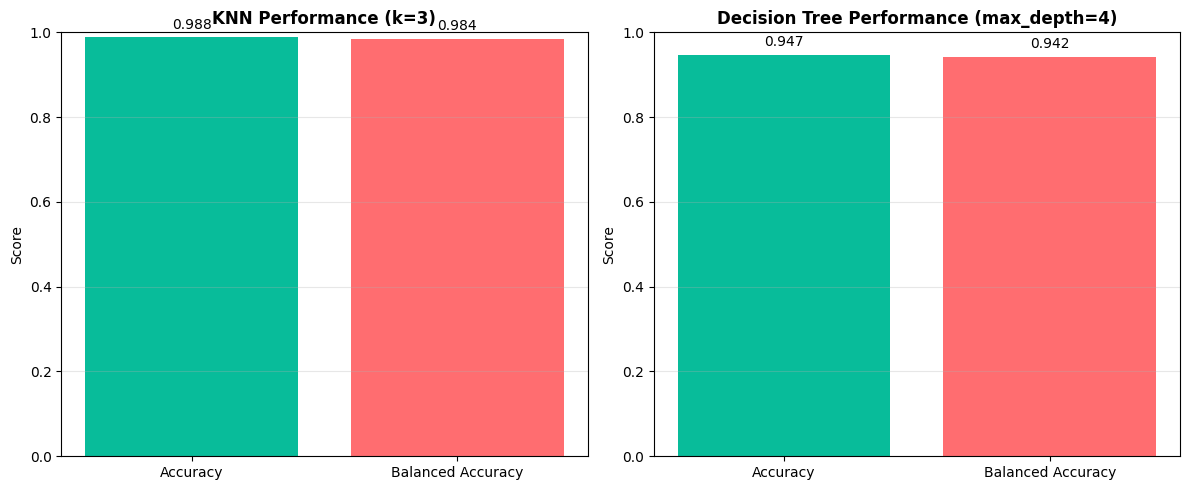

In [742]:
print("=" * 80)
print("PART D: Mini Model Zoo & Hyperparameters")
print("=" * 80)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import balanced_accuracy_score

print(f"Assigned hyperparameters:")
print(f"  KNN: n_neighbors = {knn_k}")
print(f"  Decision Tree: max_depth = {tree_depth}")
print()

# Train and evaluate KNN
knn = KNeighborsClassifier(n_neighbors=knn_k)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_balanced_acc = balanced_accuracy_score(y_test, y_pred_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)

print("-" * 80)
print("K-Nearest Neighbors (KNN) Results:")
print("-" * 80)
print(f"Test Accuracy: {knn_accuracy:.4f}")
print(f"Balanced Accuracy: {knn_balanced_acc:.4f}")
print(f"Confusion Matrix:\n{knn_cm}")

print("\n" + "-" * 80)
print("KNN Explanation:")
print("-" * 80)
knn_k = 3

print(f"KNN is a non-parametric method that classifies points based on the majority class \nof their {knn_k} nearest neighbors, storing all training data.")
print(f"\nEffect of n_neighbors={knn_k}:")
print(f"- Lower k ({knn_k} is relatively low): Sensitive to noise (higher variance) but \ncan capture complex boundaries")
print("- Higher k: Smoother boundaries (lower variance, higher bias) but may oversimplify")
print("\nKNN does not give probabilities by default but can show class proportions.")


# Train and evaluate Decision Tree
tree = DecisionTreeClassifier(max_depth=tree_depth, random_state=seed)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
y_pred_proba_tree = tree.predict_proba(X_test_scaled)[:, 1]

tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_balanced_acc = balanced_accuracy_score(y_test, y_pred_tree)
tree_cm = confusion_matrix(y_test, y_pred_tree)

print("\n" + "-" * 80)
print("Decision Tree Results:")
print("-" * 80)
print(f"Test Accuracy: {tree_accuracy:.4f}")
print(f"Balanced Accuracy: {tree_balanced_acc:.4f}")
print(f"Confusion Matrix:\n{tree_cm}")

print("\n" + "-" * 80)
print("DECISION TREE EXPLANATION:")
print("-" * 80)

print("Decision Trees are non-parametric models that split the feature space using \nif-then rules. They handle non-linear relationships without feature scaling.")
print(f"\nEffect of max_depth={tree_depth}:")
print(f"- Shallow trees (depth={tree_depth}): Simpler, lower variance but may underfit")
print("- Deep trees: Higher variance, lower bias - can overfit training data")
print("\nTrees can show feature importance but are not probabilistic by default.\n")

# Comparison plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KNN Performance
knn_metrics = [knn_accuracy, knn_balanced_acc]
knn_positions = np.arange(len(knn_metrics))
axes[0].bar(knn_positions, knn_metrics, color=[PRIMARY_COLOR, SECONDARY_COLOR])
axes[0].set_xticks(knn_positions)
axes[0].set_xticklabels(['Accuracy', 'Balanced Accuracy'])
axes[0].set_ylim(0, 1)
axes[0].set_ylabel('Score')
axes[0].set_title(f'KNN Performance (k={knn_k})', fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(knn_metrics):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center')

# Decision Tree Performance
tree_metrics = [tree_accuracy, tree_balanced_acc]
tree_positions = np.arange(len(tree_metrics))
axes[1].bar(tree_positions, tree_metrics, color=[PRIMARY_COLOR, SECONDARY_COLOR])
axes[1].set_xticks(tree_positions)
axes[1].set_xticklabels(['Accuracy', 'Balanced Accuracy'])
axes[1].set_ylim(0, 1)
axes[1].set_ylabel('Score')
axes[1].set_title(f'Decision Tree Performance (max_depth={tree_depth})', fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(tree_metrics):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

## Part E - Simulation & Randomness

PART E: Simulation & Randomness
Simulation parameters:
  Coin bias p = 0.55
  Sample sizes N = [100, 1000, 10000]

N = 100:
  True p = 0.55
  Estimated p = 0.5500
  Absolute error = 0.0000
  Heads count = 55

N = 1000:
  True p = 0.55
  Estimated p = 0.5670
  Absolute error = 0.0170
  Heads count = 567

N = 10000:
  True p = 0.55
  Estimated p = 0.5462
  Absolute error = 0.0038
  Heads count = 5462


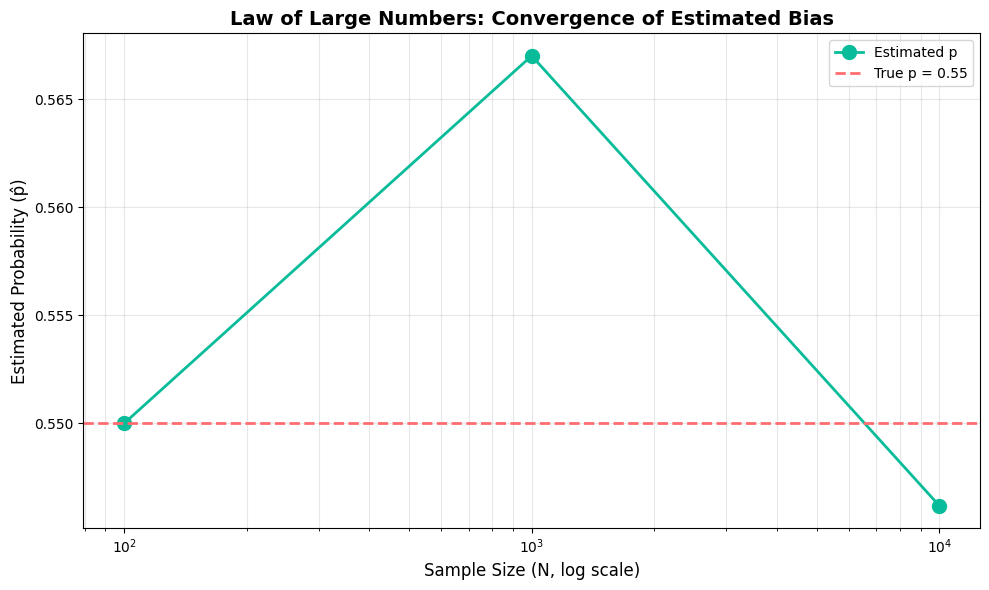

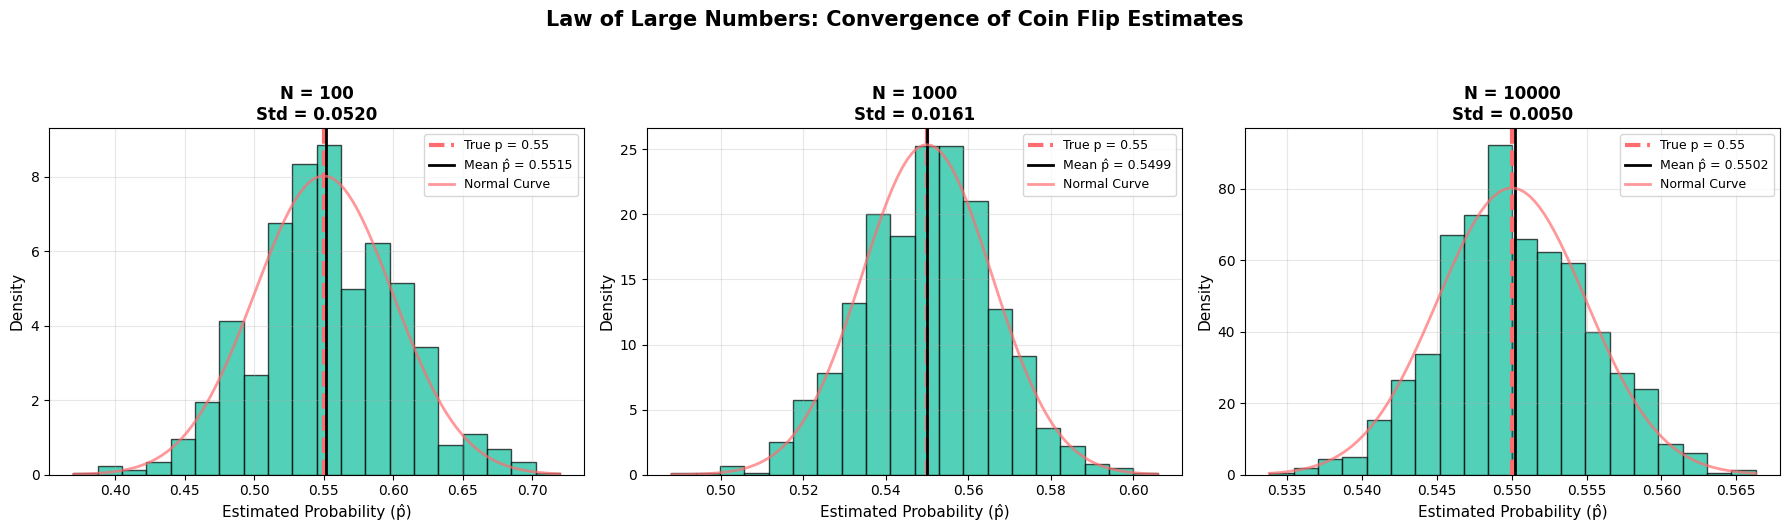


--------------------------------------------------------------------------------
Interpretation:
--------------------------------------------------------------------------------
Randomness in simulation causes variability in estimates, but the Law of Large 
Numbers ensures convergence as N increases.

For N=100, estimates fluctuate more due to random sampling. As N grows to 1000 
and 10000, estimates stabilize closer to the true p=0.55. Smaller N (<100) gives 
unstable, high-variance estimates, larger N gives very precise estimates.

Convergence speed depends on variance p(1-p), values near 0.5 converge slowest. This 
shows how simulation uses randomness to approximate theoretical properties, needing 
enough samples for reliability.


In [753]:
print("=" * 80)
print("PART E: Simulation & Randomness")
print("=" * 80)

print(f"Simulation parameters:")
print(f"  Coin bias p = {sim_bias_p}")
print(f"  Sample sizes N = [100, 1000, 10000]")

PRIMARY_COLOR = '#08BC9A'
SECONDARY_COLOR = '#FF6D70'

sample_sizes = [100, 1000, 10000]
estimated_ps = []
results = [] 

num_reps = 1000  

rng = np.random.default_rng(seed)

for N in sample_sizes:
    flips = rng.binomial(1, sim_bias_p, N)
    estimated_p = flips.mean()
    estimated_ps.append(estimated_p)

    # Repeated experiments for convergence histograms
    estimates = rng.binomial(1, sim_bias_p, (num_reps, N)).mean(axis=1)

    results.append({
        "N": N,
        "estimates": estimates,
        "mean_p": estimates.mean(),
        "std_p": estimates.std()
    })
    
    print(f"\nN = {N}:")
    print(f"  True p = {sim_bias_p}")
    print(f"  Estimated p = {estimated_p:.4f}")
    print(f"  Absolute error = {abs(estimated_p - sim_bias_p):.4f}")
    print(f"  Heads count = {flips.sum()}")


# Plot convergence
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, estimated_ps, marker='o', linewidth=2, 
         color=PRIMARY_COLOR, markersize=10, label='Estimated p')
plt.axhline(y=sim_bias_p, color=SECONDARY_COLOR, linestyle='--', 
           linewidth=2, label=f'True p = {sim_bias_p}')
plt.xscale('log')
plt.xlabel('Sample Size (N, log scale)', fontsize=12)
plt.ylabel('Estimated Probability (p̂)', fontsize=12)
plt.title('Law of Large Numbers: Convergence of Estimated Bias', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
plt.show()

print("\n")
# Histogram Convergence
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, result in zip(axes, results):
    N = result['N']
    estimates = result['estimates']

    # Histogram of estimates
    ax.hist(estimates, bins=20, alpha=0.7, 
            color=PRIMARY_COLOR, edgecolor='black', density=True)

    # True value line
    ax.axvline(sim_bias_p, color=SECONDARY_COLOR, linestyle='--', linewidth=3,
               label=f'True p = {sim_bias_p}')

    # Mean estimate line
    ax.axvline(result['mean_p'], color='black', linestyle='-', linewidth=2,
               label=f'Mean p̂ = {result["mean_p"]:.4f}')

    # Normal curve
    x = np.linspace(min(estimates), max(estimates), 100)
    y = stats.norm.pdf(x, sim_bias_p, np.sqrt(sim_bias_p*(1-sim_bias_p)/N))
    ax.plot(x, y, SECONDARY_COLOR, linewidth=2, alpha=0.7, 
            label='Normal Curve')

    ax.set_xlabel('Estimated Probability (p̂)', fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'N = {N}\nStd = {result["std_p"]:.4f}', 
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Law of Large Numbers: Convergence of Coin Flip Estimates',
             fontsize=15, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()

print("\n" + "-" * 80)
print("Interpretation:")
print("-" * 80)
print("Randomness in simulation causes variability in estimates, but the Law of Large \nNumbers ensures convergence as N increases.")
print("\nFor N=100, estimates fluctuate more due to random sampling. As N grows to 1000 \nand 10000, estimates stabilize closer to the true p=0.55. Smaller N (<100) gives \nunstable, high-variance estimates, larger N gives very precise estimates.")
print("\nConvergence speed depends on variance p(1-p), values near 0.5 converge slowest. This \nshows how simulation uses randomness to approximate theoretical properties, needing \nenough samples for reliability.")

## Part F - Regex & TF-IDF & Sentiment

In [760]:
print("=" * 80)
print("PART F: Regex & TF-IDF & Sentiment")
print("=" * 80)

# Part F1: Regex
print("\n" + "=" * 80)
print("PART F1: Regular Expressions")
print("=" * 80)

# Create sample text
sample_text = """UMKC communications from last semester:
Emily Forest reached out to the admissions office on 2025-08-12 regarding application APP-2024-001.
Email: emily.forest@umkc.edu, Phone: 816-555-1122.
Syed Jawad Shah submitted a query on 08/20/2025 about scholarship SCH-9876.
Contact: sjh.shah@mail.umkc.edu, alternate: syed.shah@gmail.com.
Follow-up discussion on September 5, 2024 for housing request HSG-4455.
Faculty feedback received on 2025-09-10 for course CUR-3012.
IT support ticket opened on 09/15/25 for technical issue TECH-2025-99.
All records must be entered into UMKC system with ID UMKC-SYS-1001."""


print("Sample Text:")
print("-" * 80)
print(sample_text)
print()

# Define regex patterns
email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
date_pattern = r'\b(?:\d{4}-\d{2}-\d{2}|\d{1,2}/\d{1,2}/\d{2,4})\b'
id_pattern = r'\b(?:SYS|APP|SCH|HSG|CUR|TECH|UMKC-SYS)-\d+(?:-\d+)?\b'

# Find matches
email_matches = re.findall(email_pattern, sample_text, re.IGNORECASE)
date_matches = re.findall(date_pattern, sample_text)
id_matches = re.findall(id_pattern, sample_text, re.IGNORECASE)

print("Regex Matches:")
print("-" * 80)
print(f"Emails found ({len(email_matches)}): {email_matches}")
print(f"Dates found ({len(date_matches)}): {date_matches}")
print(f"IDs found ({len(id_matches)}): {id_matches}")

print("\n" + "-" * 80)
print("Regex Components Explanation:")
print("-" * 80)
print("1. Alternation (|): 'a|b' matches either a OR b")
print("   Used in date_pattern: matches YYYY-MM-DD OR MM/DD/YYYY")
print()
print("2. Character Sets ([]): '[A-Za-z]' matches any uppercase/lowercase letter")
print("   Used in email_pattern: matches valid email characters")
print()
print("3. Anchors (^, $, \\b): '\\bword\\b' matches whole words only")
print("   Used in all patterns to prevent partial matches")
print()
print("4. Quantifiers (+, *, ?, {}): '\\d{4}' matches exactly 4 digits")
print("   Used: '+' (1 or more), '{2,}' (2 or more), '{1,2}' (1 or 2)")

PART F: Regex & TF-IDF & Sentiment

PART F1: Regular Expressions
Sample Text:
--------------------------------------------------------------------------------
UMKC communications from last semester:
Emily Forest reached out to the admissions office on 2025-08-12 regarding application APP-2024-001.
Email: emily.forest@umkc.edu, Phone: 816-555-1122.
Syed Jawad Shah submitted a query on 08/20/2025 about scholarship SCH-9876.
Contact: sjh.shah@mail.umkc.edu, alternate: syed.shah@gmail.com.
Follow-up discussion on September 5, 2024 for housing request HSG-4455.
Faculty feedback received on 2025-09-10 for course CUR-3012.
IT support ticket opened on 09/15/25 for technical issue TECH-2025-99.
All records must be entered into UMKC system with ID UMKC-SYS-1001.

Regex Matches:
--------------------------------------------------------------------------------
Emails found (3): ['emily.forest@umkc.edu', 'sjh.shah@mail.umkc.edu', 'syed.shah@gmail.com']
Dates found (4): ['2025-08-12', '08/20/2025', '

In [773]:
# Part F2: NLP Mini-task
print("\n" + "=" * 80)
print("PART F2: NLP mini-task")
print("=" * 80)

# Create tiny labeled corpus
corpus = [
    # Positive sentences
    "I love this product, it works perfectly!",
    "Excellent service, very happy with the results.",
    "Great experience, would definitely recommend.",
    "The quality is outstanding and worth every penny.",
    "Fantastic support team, very responsive and helpful.",
    "Amazing features, exceeded my expectations.",
    "Perfect solution for my needs, highly satisfied.",
    "Wonderful customer experience from start to finish.",
    
    # Negative sentences  
    "Terrible product, completely disappointed.",
    "Poor quality, broke after first use.",
    "Waste of money, does not work as advertised.",
    "Horrible customer service, never responding.",
    "Very frustrating experience, would not recommend.",
    "Bad design, difficult to use and unreliable.",
    "Awful performance, constant problems and issues.",
    "Disappointing results, not worth the price."
]

labels = [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]  # 1=positive, 0=negative

print("Corpus (16 sentences, 8 positive, 8 negative):")
print("-" * 60)
for i, (sentence, label) in enumerate(zip(corpus, labels)):
    print(f"{i+1:2}. [{'+' if label == 1 else '-'}] {sentence}")
print()

# TF-IDF and Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create TF-IDF features
vectorizer = TfidfVectorizer(max_features=50, stop_words='english')
X_tfidf = vectorizer.fit_transform(corpus)

# Split data
X_train_txt, X_test_txt, y_train_txt, y_test_txt = train_test_split(
    X_tfidf, labels, test_size=0.25, random_state=seed, stratify=labels
)

# Train Logistic Regression
lr_text = LogisticRegression(random_state=seed)
lr_text.fit(X_train_txt, y_train_txt)

# Evaluate
train_acc = lr_text.score(X_train_txt, y_train_txt)
test_acc = lr_text.score(X_test_txt, y_test_txt)

print("TF-IDF & Logistic Regression Results:")
print("-" * 40)
print(f"Training accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")
print()

# Get feature names and their IDF values
feature_names = vectorizer.get_feature_names_out()
idf_values = vectorizer.idf_

# Find some example terms
print("Example TF-IDF Values:")
print("-" * 40)

# Term that appears in many documents
common_terms = ['product', 'experience', 'recommend']
# Term that appears in few documents
rare_terms = ['exceeded', 'horrible', 'fantastic']

for term in common_terms + rare_terms:
    if term in feature_names:
        idx = list(feature_names).index(term)
        print(f"'{term}': IDF = {idf_values[idx]:.4f}")

avg_tfidf = X_tfidf.toarray().mean(axis=0)  # Average TF-IDF for each feature
top_n = 10
top_indices = np.argsort(avg_tfidf)[-top_n:][::-1]  # Indices of top TF-IDF features
top_features = feature_names[top_indices]
top_values = avg_tfidf[top_indices]


print("\n" + "-" * 80)
print("TF-IDF Behavior Explanation:")
print("-" * 80)
print("TF-IDF = Term Frequency × Inverse Document Frequency")
print("IDF = log(N / (documents containing term))")
print()
print("Term in ALL documents (e.g., common words like 'the', 'and'):")
print("  IDF = log(N/N) = log(1) = 0 --> TF-IDF = 0")
print("  Such terms get zero weight as they do not discriminate between documents")
print()
print("Term in FEW documents (e.g., 'exceeded', 'horrible'):")
print("  IDF = log(N/small_number) = large value --> High TF-IDF")
print("  These terms are highly discriminative and receive strong weight")
print()
print("In sentiment analysis, sentiment-bearing words (great, terrible) appear")
print("in specific classes, giving them high IDF and making them useful features.")
print("Stop words (the, and, is) appear everywhere, getting IDF near 0 and filtered out.")


PART F2: NLP mini-task
Corpus (16 sentences, 8 positive, 8 negative):
------------------------------------------------------------
 1. [+] I love this product, it works perfectly!
 2. [+] Excellent service, very happy with the results.
 3. [+] Great experience, would definitely recommend.
 4. [+] The quality is outstanding and worth every penny.
 5. [+] Fantastic support team, very responsive and helpful.
 6. [+] Amazing features, exceeded my expectations.
 7. [+] Perfect solution for my needs, highly satisfied.
 8. [+] Wonderful customer experience from start to finish.
 9. [-] Terrible product, completely disappointed.
10. [-] Poor quality, broke after first use.
11. [-] Waste of money, does not work as advertised.
12. [-] Horrible customer service, never responding.
13. [-] Very frustrating experience, would not recommend.
14. [-] Bad design, difficult to use and unreliable.
15. [-] Awful performance, constant problems and issues.
16. [-] Disappointing results, not worth the price.